# Connectome Measurements

We consider approaches to measure connectome phenomena of a brain circuit.

In [5]:
#essential imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from dmt.tk.phenomenon import Phenomenon
from dmt.tk.parameters import Parameters
from dmt.tk.plotting import Bars, LinePlot, HeatMap
from neuro_dmt import terminology
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.composition\
    import CompositionAnalysesSuite
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.connectome\
    import ConnectomeAnalysesSuite
from neuro_dmt.models.bluebrain.circuit.atlas import\
    BlueBrainCircuitAtlas
from neuro_dmt.models.bluebrain.circuit.model import\
    BlueBrainCircuitModel,\
    CircuitProvenance
from neuro_dmt.models.bluebrain.circuit.adapter import\
    BlueBrainCircuitAdapter
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.tools\
    import PathwayMeasurement
from neuro_dmt.analysis.circuit import BrainCircuitAnalysis

We define some methods to load circuits from their location.

In [6]:
#paths to circuits
project =\
    os.path.join(
        "/gpfs/bbp.cscs.ch/project")
proj_sscx_diss=\
    os.path.join(
        project,
        "proj83")
data_sscx_diss=\
    os.path.join(
        proj_sscx_diss,
        "data")
atlases_sscx_diss=\
    os.path.join(
        data_sscx_diss,
        "atlas/S1/MEAN")
circuits_sscx_diss=\
    os.path.join(
        proj_sscx_diss,
        "circuits")
atlas_bio_m =\
    BlueBrainCircuitAtlas(
        path=os.path.join(
                atlases_sscx_diss, "P14-MEAN"))
path_bio_m =\
    os.path.join(
        circuits_sscx_diss,
        "Bio_M/20191206")


We will use the *BioM* circuit for analyzing.
To analyze a circuit model, we will also need an adapter.

In [7]:
circuit_bio_m =\
    BlueBrainCircuitModel(
        path_circuit_data=path_bio_m,
            provenance=CircuitProvenance(
                label="SSCxRatDisseminationBioM",
                authors=["BBP Team"],
                release_date="20191212",
                uri=path_bio_m,
                animal="Wistar Rat",
                age="P14",
                brain_region="SSCx"))
adapter =\
    BlueBrainCircuitAdapter()


# Mock Circuit
We will test our connectome measurement tools against a mock circuit.

In [8]:
from neuro_dmt.models.bluebrain.circuit.mock.circuit import\
    MockBlueBrainCircuitModel
from neuro_dmt.models.bluebrain.circuit.mock.test.mock_circuit_light import\
    circuit_composition,\
    circuit_connectivity

mock_circuit_model =\
    MockBlueBrainCircuitModel(
        circuit_composition, 
        circuit_connectivity,
        label="BlueBrainCircuitModelMockLight")

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-26 09:58:00>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/__init__.py
	lineno: 	138
	code_context: 	['        __log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 2
with number of excitatory mtypes: 1

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-26 09:58:00>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/__init__.py
	lineno: 	138
	code_context: 	['        __log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 3
with number of excitatory mtypes: 1

test develop mock circuit Logger                                    

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-26 09:58:00>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/mock_circuit_light.py
	lineno: 	107
	code_context: 	['        log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 4
with number of excitatory mtypes: 1

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-26 09:58:00>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/mock_circuit_light.py
	lineno: 	107
	code_context: 	['        log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 5
with number of excitatory mtypes: 3

test develop mock circuit Logger                    

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-26 09:58:00>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/mock_circuit_light.py
	lineno: 	107
	code_context: 	['        log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 6
with number of excitatory mtypes: 4

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-26 09:58:00>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/mock_circuit_light.py
	lineno: 	107
	code_context: 	['        log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 6
with number of excitatory mtypes: 4

test develop mock circuit Logger                    

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-26 09:58:00>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/mock_circuit_light.py
	lineno: 	107
	code_context: 	['        log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 6
with number of excitatory mtypes: 4

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-26 09:58:00>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/mock_circuit_light.py
	lineno: 	107
	code_context: 	['        log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 6
with number of excitatory mtypes: 4



37it [00:00, 369.98it/s]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/builder.py Logger
DEBUGINFO@<2020-02-26 09:58:00>                                                 
Mock circuit builder: get_connectome(...)



82304it [03:19, 412.45it/s]


Set the circuit model to work with:

In [9]:
circuit_model = mock_circuit_model

# Pathway Measurement

We will use our tool `PathwayMeasurement` to make measurment on pathways of the 
circuit connectome.

In [11]:
from importlib import reload
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.tools\
    import pathway_measurement

In [8]:
from neuro_dmt.library.users.visood.sscx_dissemination.analyses import tools

measurement_connections_afferent_random_serial =\
    pathway_measurement.PathwayMeasurement(
        direction="AFF",
        value=lambda connections: 1.,
        variable="number_connections_afferent",
        specifiers_cell_type=["mtype"],
        by_soma_distance=False,
        sampling_methodology=terminology.sampling_methodology.random,
        sample_size=20,
        processing_methodology=terminology.processing_methodology.serial,
        batch_size=1)
measurement_connections_afferent_random_batch =\
    pathway_measurement.PathwayMeasurement(
        direction="AFF",
        value=lambda connections: 1.,
        variable="number_connections_afferent",
        specifiers_cell_type=["mtype"],
        by_soma_distance=False,
        sampling_methodology=terminology.sampling_methodology.random,
        sample_size=20,
        processing_methodology=terminology.processing_methodology.batch,
        batch_size=100)
measurement_connections_afferent_exh =\
    pathway_measurement.PathwayMeasurement(
        direction="AFF",
        value=lambda connections: 1.,
        variable="number_connections_afferent",
        specifiers_cell_type=["mtype"],
        by_soma_distance=False,
        sampling_methodology=terminology.sampling_methodology.exhaustive,
        processing_methodology=terminology.processing_methodology.batch,
        batch_size=100)

In [14]:
measurement_connections_afferent_random_serial.collect(
    circuit_model, adapter,
    post_synaptic_cell={"mtype": "L6_TPC:A"})

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement.sample(...)
with sampling methodology random

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 215

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 189

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx

(pre_synaptic_cell, mtype)
L1_DAC       1.0
L23_ChC      2.0
L23_MC       4.0
L23_SBC      2.0
L4_LBC       3.0
            ... 
L6_IPC      19.0
L6_MC        3.0
L6_TPC:A    24.0
L6_TPC:B    21.0
L6_UPC      24.0
Name: number_connections_afferent, Length: 357, dtype: float64

In [15]:
measurement_connections_afferent_random_batch.collect(
    circuit_model, adapter,
    post_synaptic_cell={"mtype": "L6_TPC:A"})

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement.sample(...)
with sampling methodology random

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 3915



(pre_synaptic_cell, mtype)
L1_DAC     1.0
L1_DAC     3.0
L1_DAC     1.0
L1_DAC     4.0
L1_DAC     1.0
          ... 
L6_UPC    20.0
L6_UPC    21.0
L6_UPC    16.0
L6_UPC    12.0
L6_UPC    15.0
Name: number_connections_afferent, Length: 354, dtype: float64

In [16]:
measurement_connections_afferent_exh.collect(
    circuit_model, adapter,
    post_synaptic_cell={"mtype": "L6_TPC:A"})

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement.sample(...)
with sampling methodology exhaustive

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 20088

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 20078

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/vis

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 19848

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 19961

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 19919

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissem

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 20204

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 19930

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 19903

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissem

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 20108

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 19907

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 20304

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissem

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 19989

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 19824

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:26:17>                                                 
PathwayMeasurement _method
number connections: 20108

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissem

(pre_synaptic_cell, mtype)
L1_DAC     1.0
L1_DAC     3.0
L1_DAC     1.0
L1_DAC     1.0
L1_DAC     1.0
          ... 
L6_UPC    18.0
L6_UPC    25.0
L6_UPC    15.0
L6_UPC    22.0
L6_UPC    26.0
Name: number_connections_afferent, Length: 153506, dtype: float64

## Connection Probability

Because the circuit may be very large, we will have to subset its cells to 
compute connection probability. Let us see how we can achieve this using
`PathwayMeasurement`.

Connection probability of a pathway is the number of connections between 
the pre and post cell groups divided by the total number of (pre, post) pairs.
For a given post-synaptic cell, we can compute the number of connections as 
the number of afferent connections:

In [295]:
self =\
    pathway_measurement.PathwayMeasurement(
        direction="AFF",
        value=lambda connections: 1.,
        variable="number_connections_afferent",
        specifiers_cell_type=["mtype"],
        by_soma_distance=True,
        sampling_methodology=terminology.sampling_methodology.exhaustive,
        sample_size=20,
        processing_methodology=terminology.processing_methodology.batch,
        batch_size=100,
        fraction_circuit_cells=0.1,
        summaries="sum")
#number_affcons =\
#    self.collect(
#        circuit_model, adapter,
#        post_synaptic_cell={"mtype": "L6_TPC:A"})

The `PathwayMeasurement` we defined above subsets cells in the circuit to derive
a pool of cells in which all the circuit mtypes are represented. A fixed fraction
of all the circuit cells are chosen for each mtype.
The resulting `pandas.Series` gives us the number of afferent connections from
cells of each *mtype* among the pool of cells to each of the post synaptic cell 
among the pool of cells that has *mtype* *L6_TPC:A*.  


Summed over all the *L6_TPC:A* cells in the pool,
the number of afferent connections will thus be the number of connections 
afferent on the *cell group L6_TPC:A*.

In [255]:
self.norm_per_pair(
    circuit_model, adapter,
    post_synaptic_cell={"mtype": "L6_TPC:A"})

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement.sample(...)
with sampling methodology exhaustive

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement get_connections
queried gids 100
number connections: 19725

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement get_connections
queried gids 100
number connections: 19986

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/p

L1_DAC      0.002138
L1_SLAC     0.002641
L23_ChC     0.002294
L23_MC      0.002625
L23_SBC     0.002473
L4_LBC      0.002440
L4_NGC      0.002456
L4_TPC      0.002424
L5_DBC      0.002508
L5_MC       0.002306
L5_TPC:A    0.002447
L5_TPC:B    0.002447
L5_UPC      0.002471
L6_ChC      0.002472
L6_IPC      0.002447
L6_MC       0.002380
L6_TPC:A    0.002354
L6_TPC:B    0.002270
L6_UPC      0.002455
dtype: float64

So now we have our connection probability:

In [11]:
#reload the adapter after changes in its code!
from neuro_dmt.models.bluebrain.circuit.adapter import adapter as ad
reload(ad)
adapter = ad.BlueBrainCircuitAdapter()
reload(pathway_measurement)
pwymeas =\
    pathway_measurement.PathwayMeasurement(
        direction="AFF",
        value=lambda connections: 1.,
        variable="Pconn",
        specifiers_cell_type=["mtype"],
        by_soma_distance=True,
        sampling_methodology=terminology.sampling_methodology.exhaustive,
        sample_size=20,
        processing_methodology=terminology.processing_methodology.batch,
        batch_size=100,
        fraction_circuit_cells=0.1)
number_connections_pathway =\
    pwymeas.summary(
        circuit_model, adapter,
        post_synaptic_cell={"mtype": "L6_TPC:A"},
        aggregators="sum")

('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi')
/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 20:34:27>                                                 
PathwayMeasurement.sample(...)
with sampling methodology exhaustive

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 20:34:27>                                                 
PathwayMeasurement get_connections
queried gids 100
number connections: 19914

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 20:34:27>                            

/home/muchu/.vmgr_repo/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: PerformanceWarning: indexing past lexsort depth may impact performance.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
print(pwymeas.using_subset_of_cells)
print(pwymeas.connectivity)
print(number_connections_pathway.shape)
number_connections_pathway

True
Connectivity.CIRCUIT
(177,)


(pre_synaptic_cell, mtype)  soma_distance
L1_DAC                      1050.0             1.0
                            1150.0            12.0
                            1250.0            24.0
                            1350.0            15.0
                            1450.0            18.0
                            1550.0            13.0
                            1650.0            18.0
                            1750.0            16.0
                            1850.0             3.0
L1_SLAC                     1050.0             1.0
                            1150.0            14.0
                            1250.0            13.0
                            1350.0            14.0
                            1450.0            17.0
                            1550.0            33.0
                            1650.0            23.0
                            1750.0            16.0
                            1850.0             1.0
L23_ChC                     750.0       

In [34]:
cpwymeas =\
    pwymeas.with_field_values(
        connectivity=pathway_measurement.Connectivity.COMPLETE,
        cache_cells=pwymeas.cache_cells)
number_pairs_pathway =\
    cpwymeas.summary(
        circuit_model, adapter,
        post_synaptic_cell={"mtype": "L6_TPC:A"},
        aggregators="sum")

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 20:34:27>                                                 
PathwayMeasurement.sample(...)
with sampling methodology exhaustive

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 20:34:27>                                                      
_method call count : 29

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 20:34:27>                                                      
_method call count : 30

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 20:34:27>                                                    

In [102]:
print(cpwymeas.using_subset_of_cells)
print(cpwymeas.connectivity)
print(number_pairs_pathway.shape)
number_pairs_pathway

True
Connectivity.COMPLETE
(189,)


(pre_synaptic_cell, mtype)  soma_distance
L1_DAC                      1050.0              106.0
                            1150.0             4024.0
                            1250.0             6931.0
                            1350.0             7367.0
                            1450.0             7493.0
                                               ...   
L6_UPC                      350.0            130689.0
                            450.0             82437.0
                            550.0             43317.0
                            650.0              7920.0
                            750.0                 2.0
Name: Pconn, Length: 189, dtype: float64

Cache of cells must be the same:

In [103]:
pd.testing.assert_frame_equal(
    pwymeas.cache_cells[circuit_model],
    cpwymeas.cache_cells[circuit_model])

In [105]:
pconn_2 =\
    number_connections_pathway / number_pairs_pathway
pconn_2.dropna()

(pre_synaptic_cell, mtype)  soma_distance
L1_DAC                      1150.0           0.002982
                            1250.0           0.002308
                            1350.0           0.001765
                            1450.0           0.001735
                            1550.0           0.001828
                                               ...   
L6_UPC                      250.0            0.002430
                            350.0            0.002273
                            450.0            0.002487
                            550.0            0.002493
                            650.0            0.003409
Name: Pconn, Length: 174, dtype: float64

In [13]:
pconn =\
    pwymeas.norm_per_pair(
        circuit_model, adapter,
        post_synaptic_cell={"mtype": "L6_TPC:A"})
pconn

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 20:34:27>                                                 
PathwayMeasurement.sample(...)
with sampling methodology exhaustive

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 20:34:27>                                                 
PathwayMeasurement get_connections
queried gids 100
number connections: 19914

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 20:34:27>                                                      
_method call count : 10

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 20

/home/muchu/.vmgr_repo/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  after removing the cwd from sys.path.


/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 20:34:27>                                                      
_method call count : 19

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 20:34:27>                                                      
_method call count : 20

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 20:34:27>                                                      
_method call count : 21

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 20:34:27>                                                      
_method call count : 22

/home/muchu/work

(pre_synaptic_cell, mtype)  soma_distance
L1_DAC                      1050.0           0.010526
                            1150.0           0.002893
                            1250.0           0.003275
                            1350.0           0.002131
                            1450.0           0.002542
                            1550.0           0.001679
                            1650.0           0.002330
                            1750.0           0.002701
                            1850.0           0.004808
L1_SLAC                     1050.0           0.005291
                            1150.0           0.003028
                            1250.0           0.001770
                            1350.0           0.002008
                            1450.0           0.002395
                            1550.0           0.004237
                            1650.0           0.002994
                            1750.0           0.002908
                            1850.0      

OrderedDict([('L1_DAC', <dmt.tk.plotting.figure.Figure at 0x7f9eeda31470>),
             ('L1_SLAC', <dmt.tk.plotting.figure.Figure at 0x7f9eed971588>),
             ('L23_ChC', <dmt.tk.plotting.figure.Figure at 0x7f9eed968668>),
             ('L23_MC', <dmt.tk.plotting.figure.Figure at 0x7f9eed9acfd0>),
             ('L23_SBC', <dmt.tk.plotting.figure.Figure at 0x7f9eed81a3c8>),
             ('L4_LBC', <dmt.tk.plotting.figure.Figure at 0x7f9eed85eac8>),
             ('L4_NGC', <dmt.tk.plotting.figure.Figure at 0x7f9eed78a9b0>),
             ('L4_TPC', <dmt.tk.plotting.figure.Figure at 0x7f9eed71d438>),
             ('L5_DBC', <dmt.tk.plotting.figure.Figure at 0x7f9eed6db940>),
             ('L5_MC', <dmt.tk.plotting.figure.Figure at 0x7f9eed663e10>),
             ('L5_TPC:A', <dmt.tk.plotting.figure.Figure at 0x7f9eed663f98>),
             ('L5_TPC:B', <dmt.tk.plotting.figure.Figure at 0x7f9eed59fc50>),
             ('L5_UPC', <dmt.tk.plotting.figure.Figure at 0x7f9eed4f4f28>),
      

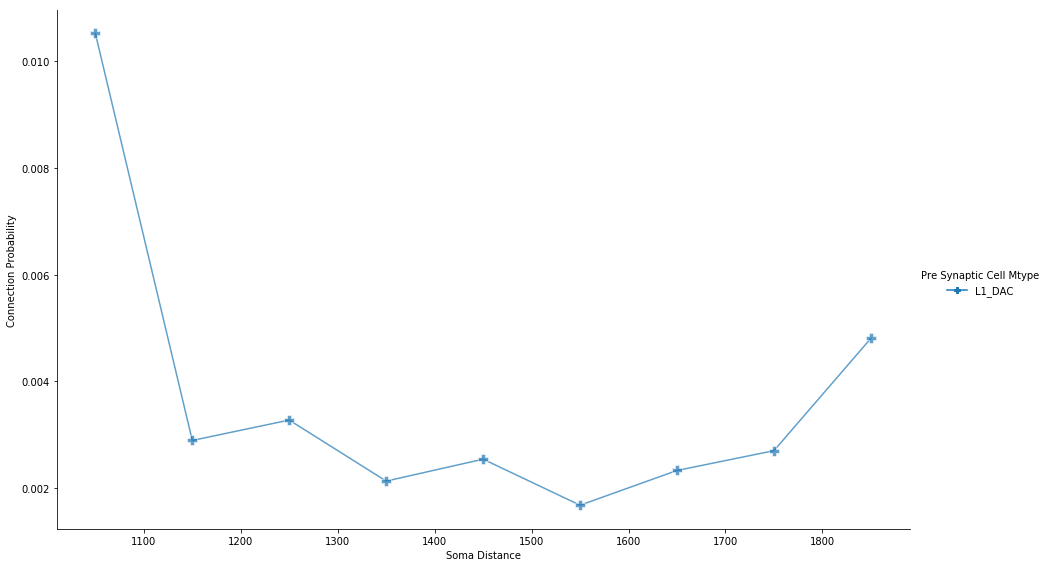

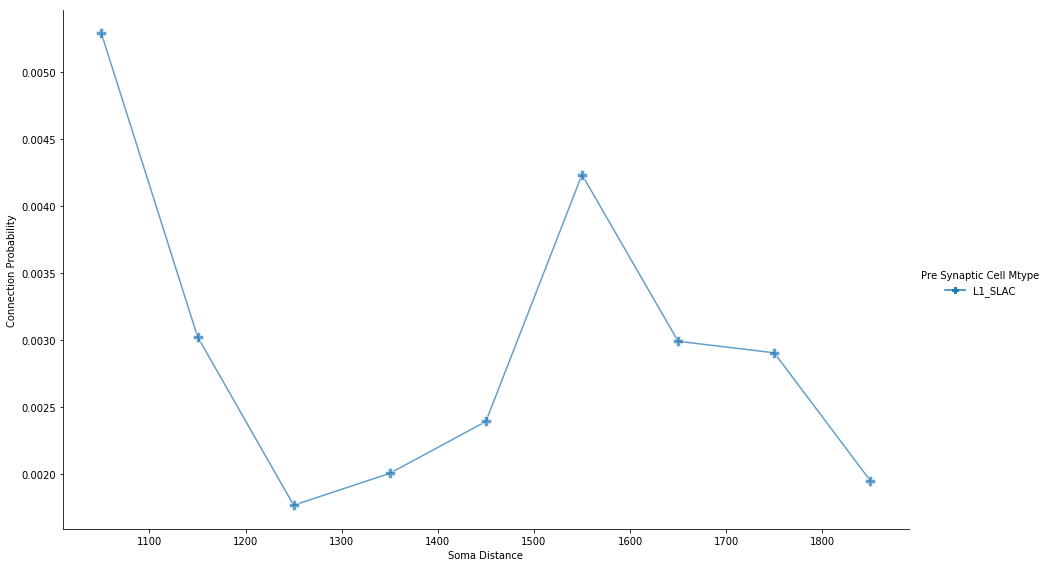

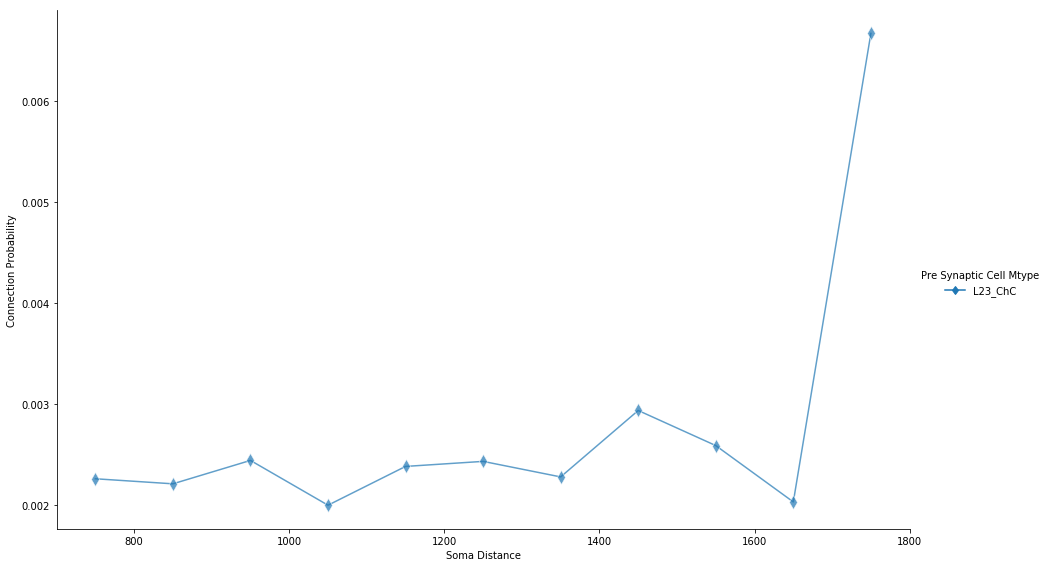

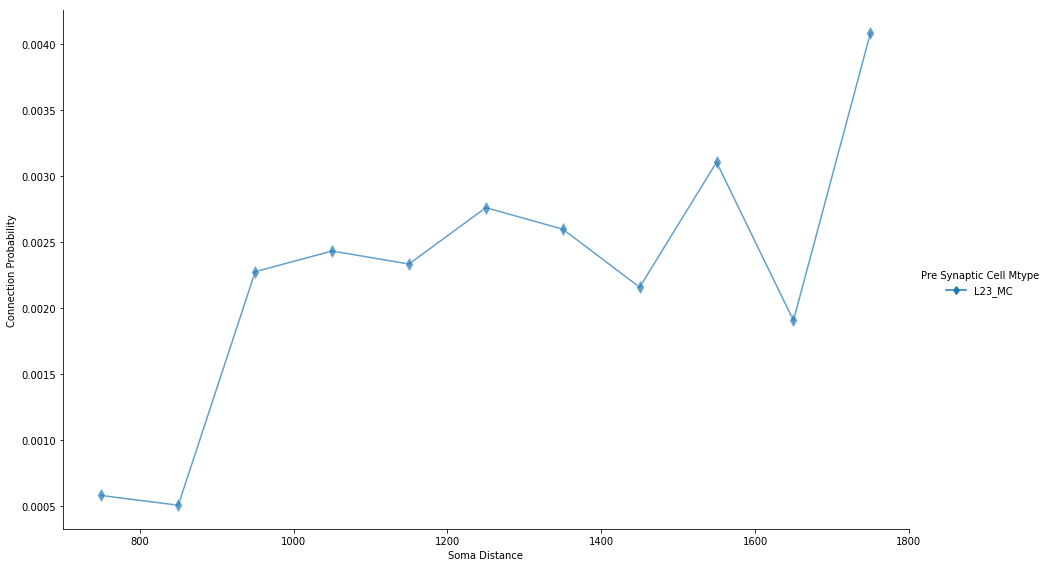

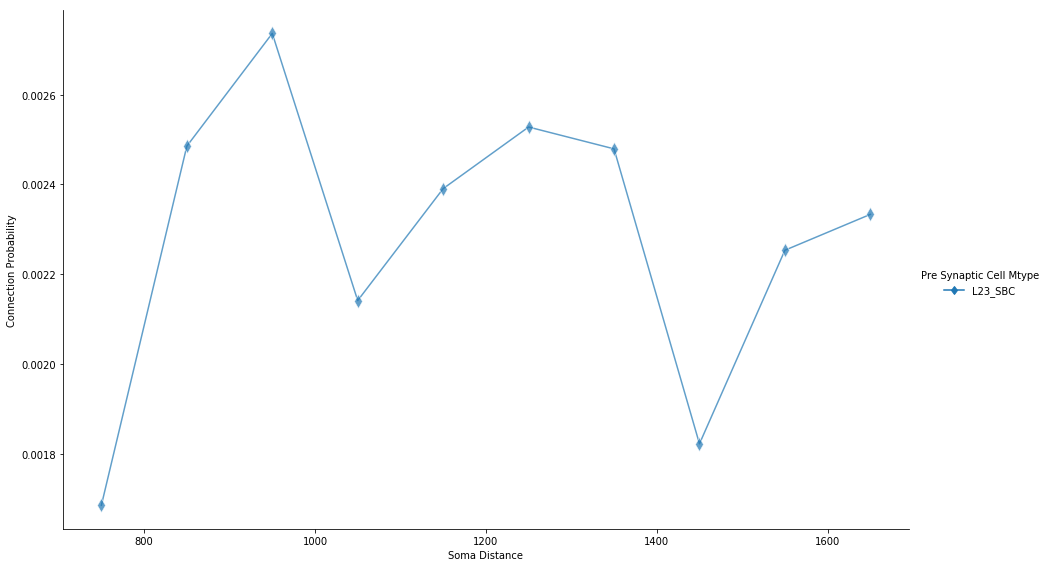

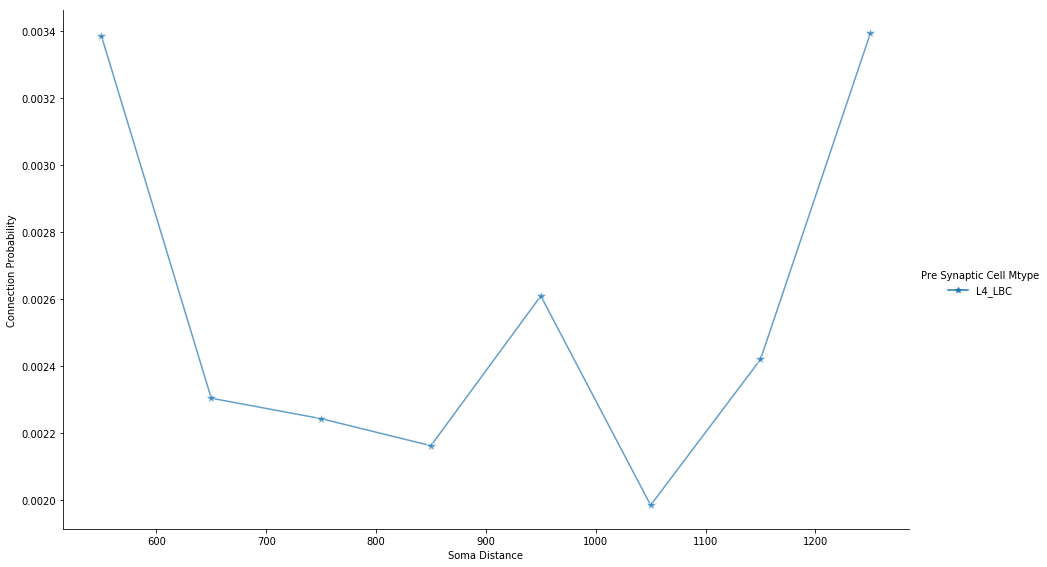

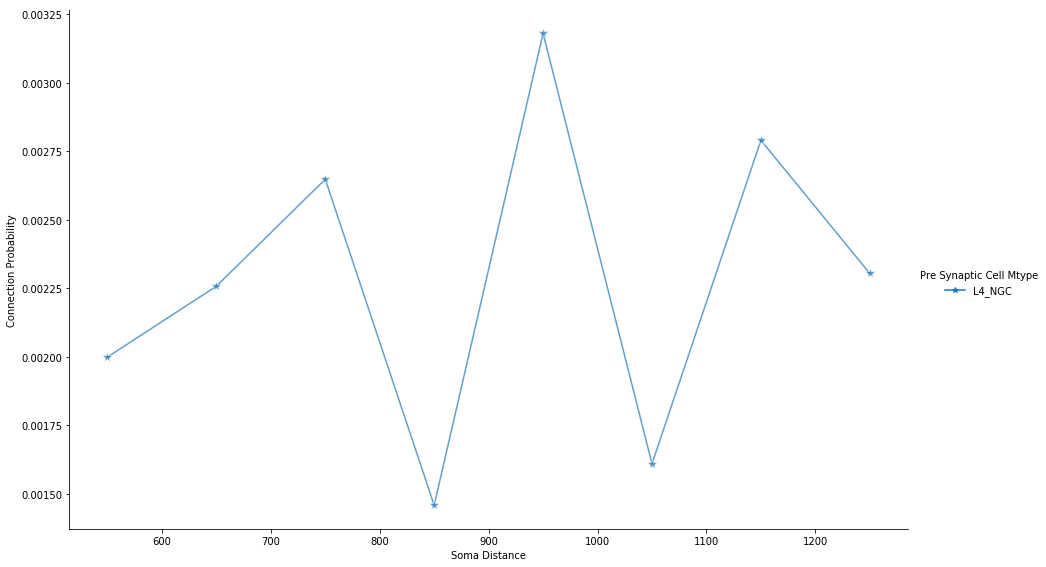

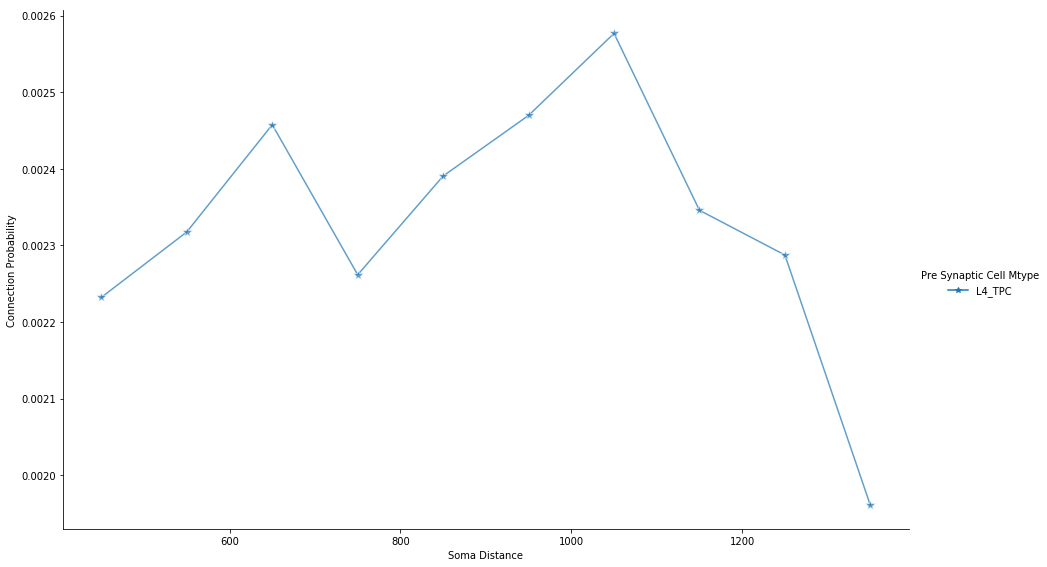

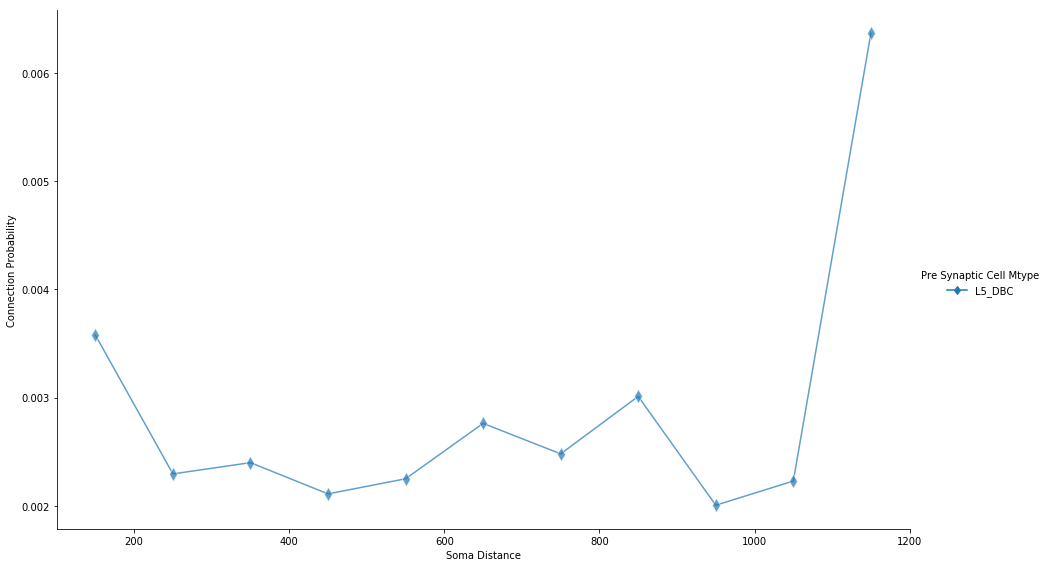

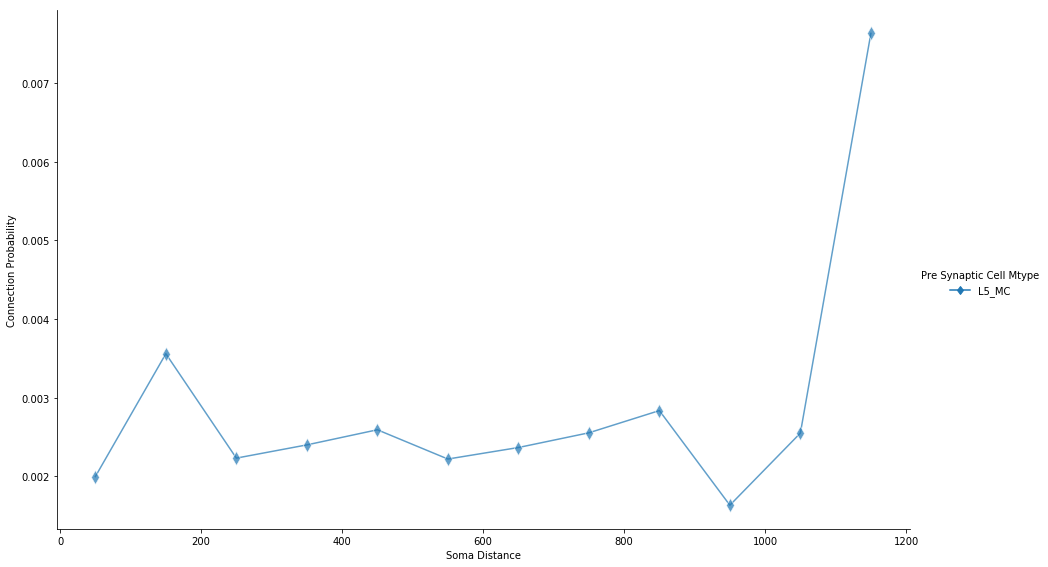

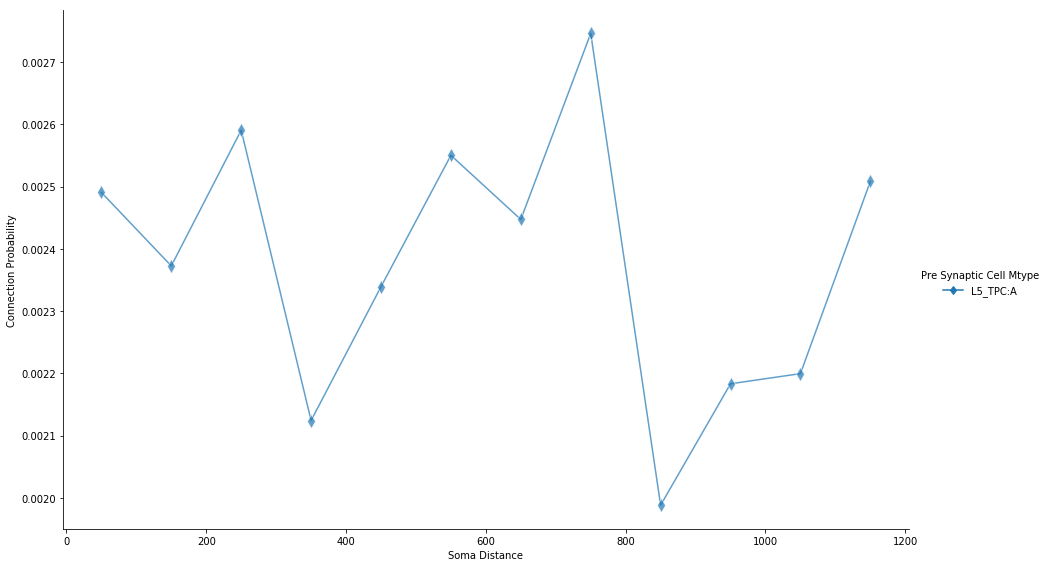

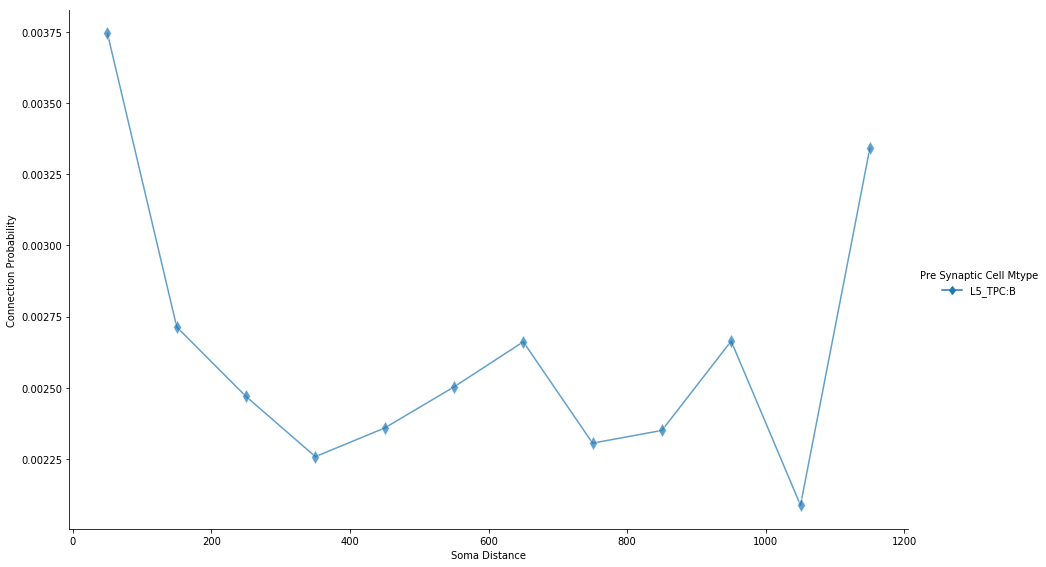

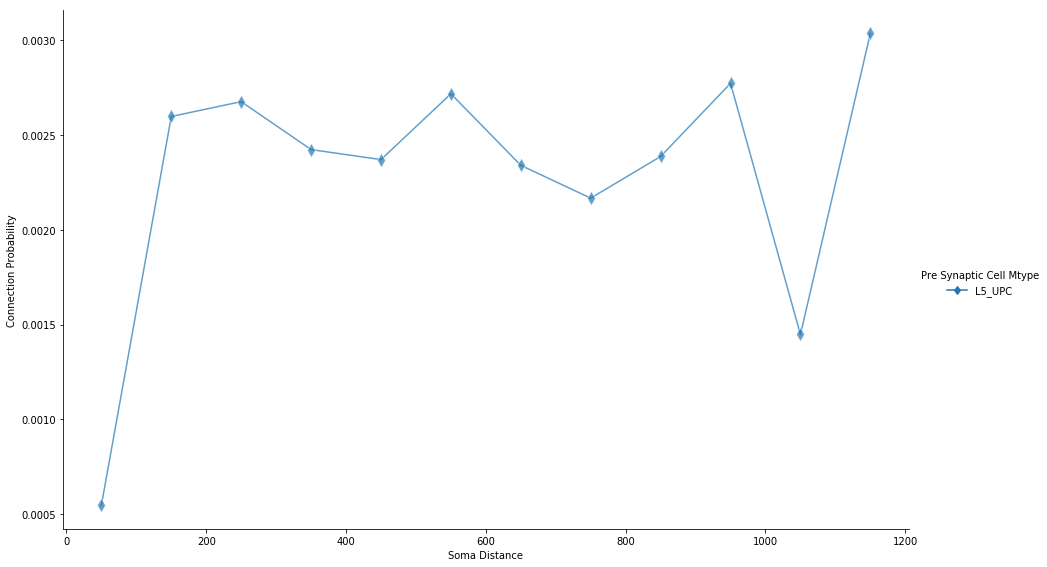

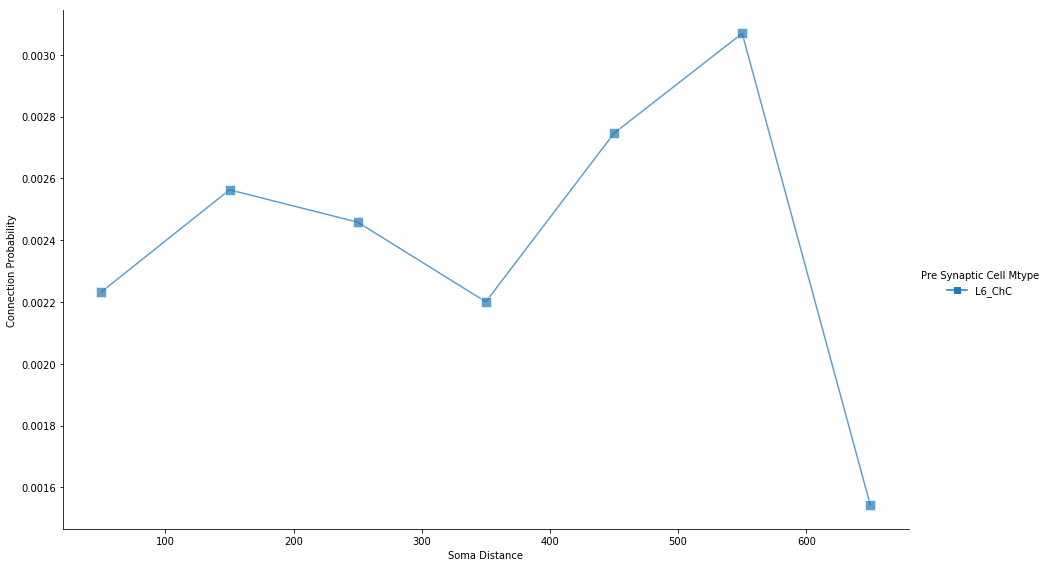

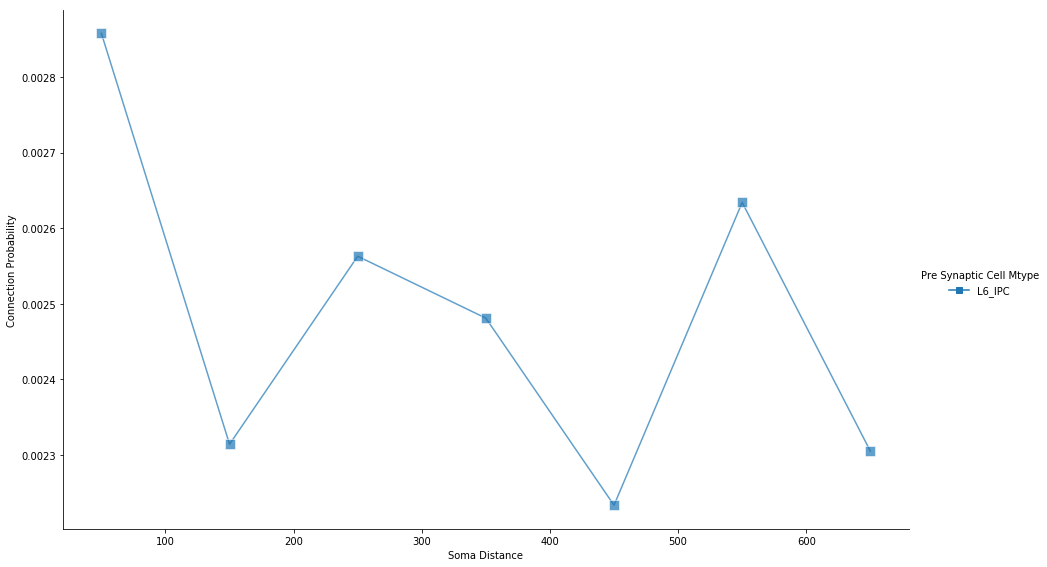

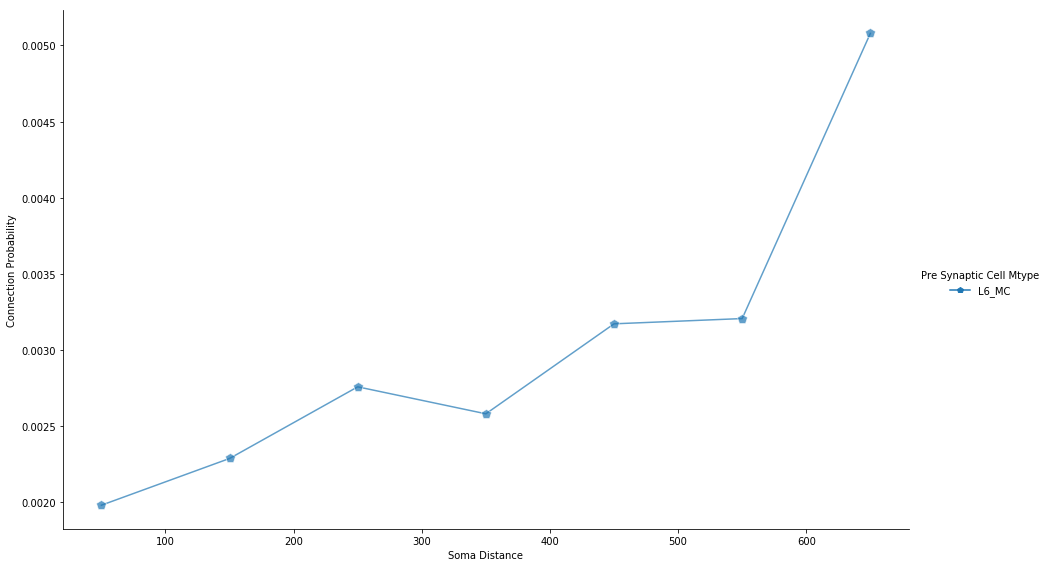

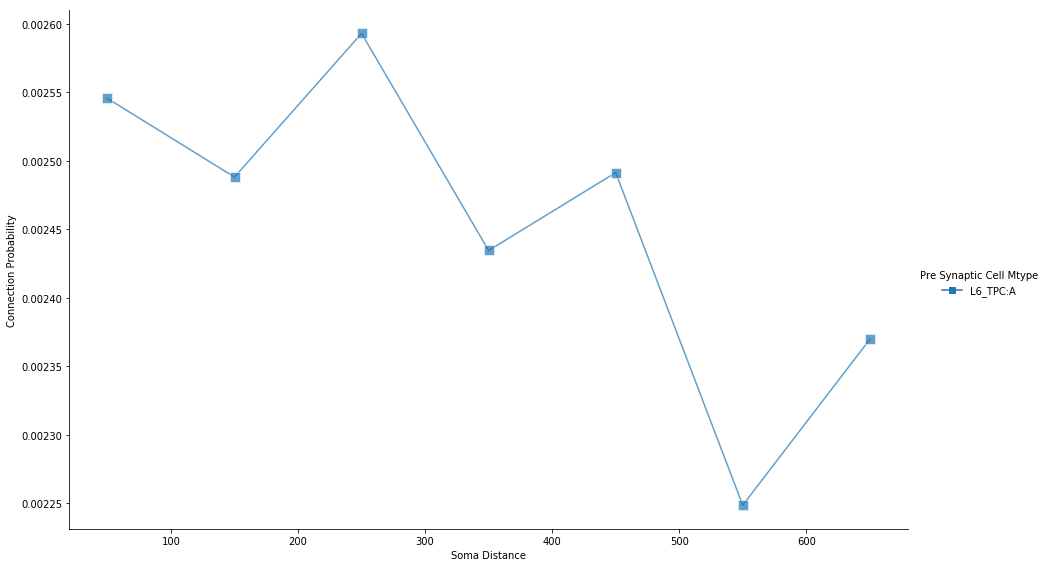

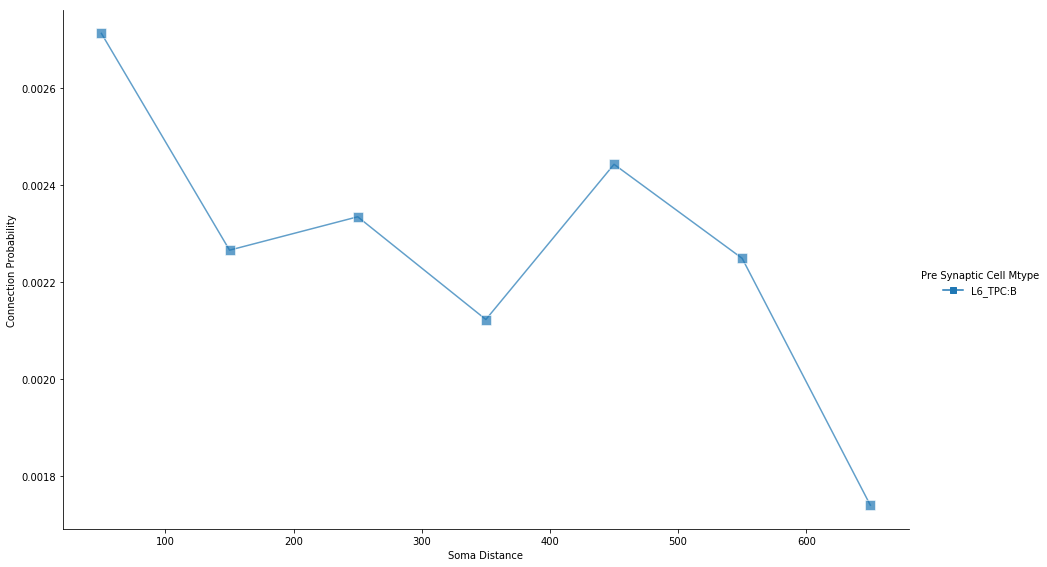

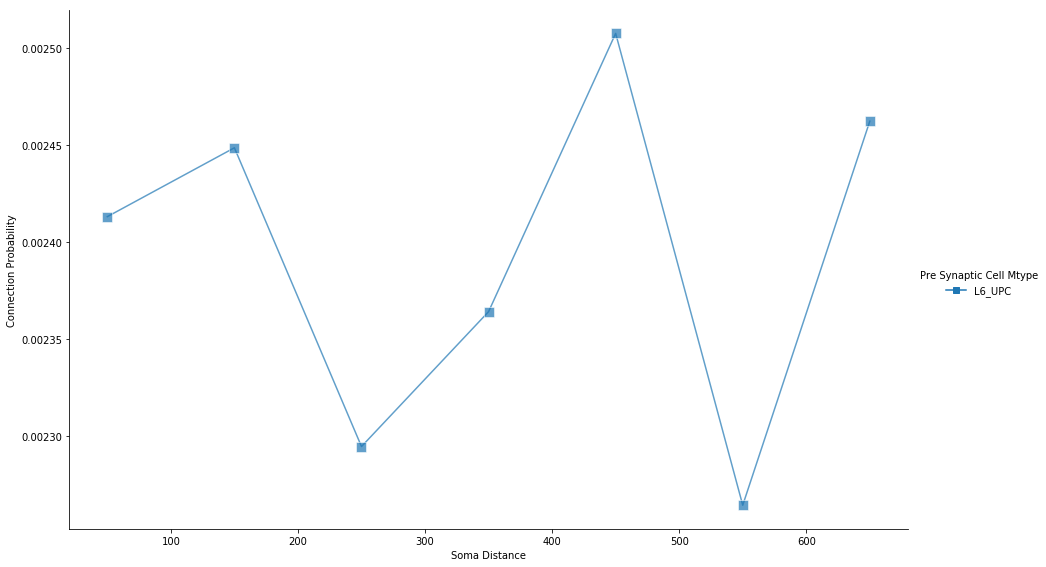

In [29]:
from dmt.tk.plotting import lines, multi
reload(lines)
reload(multi)
line_plot =\
    multi.MultiPlot(
        mvar=("pre_synaptic_cell", "mtype"),
        plotter=lines.LinePlot(
            xvar="soma_distance",
            xlabel="Soma Distance",
            yvar="Pconn",
            ylabel="Connection Probability",
            gvar=("pre_synaptic_cell", 'mtype')))

line_plot.get_figures(pconn)

OrderedDict([('Pconn', <dmt.tk.plotting.figure.Figure at 0x7f9eec1cbe48>)])

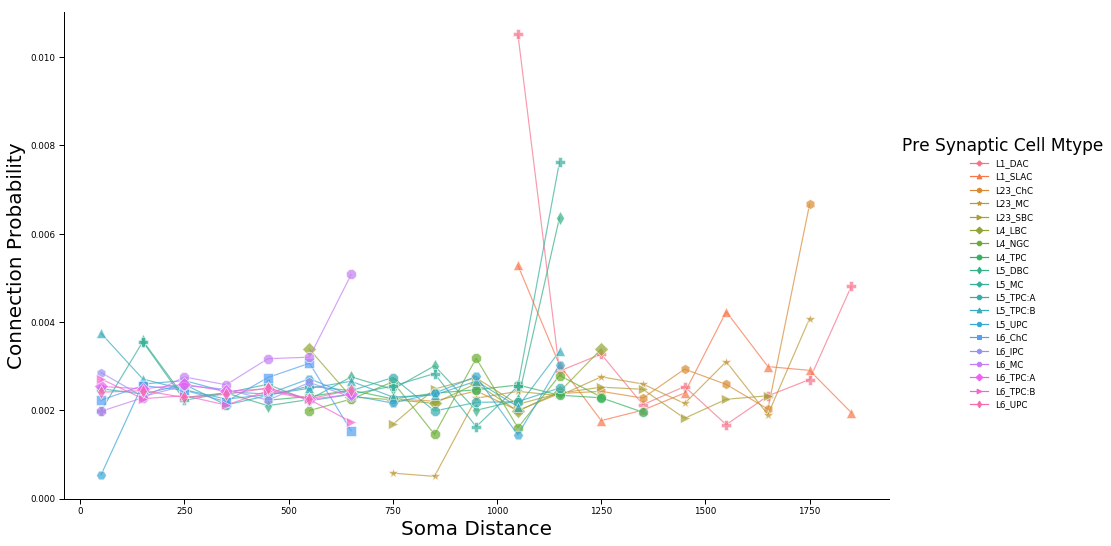

In [30]:
reload(lines)
line_plot =\
    lines.LinePlot(
        xvar="soma_distance",
        xlabel="Soma Distance",
        yvar="Pconn",
        ylabel="Connection Probability",
        gvar=("pre_synaptic_cell", "mtype"),
        marker_size=10)
line_plot(pconn.reset_index().dropna())

In [32]:
from dmt.tk.collections import take
cells =\
    pwymeas._sample_cells(
        circuit_model, adapter, {"mtype": "L6_TPC:A"})
pairs =\
    pd.concat([
        pwymeas.get_pairs(
            circuit_model, adapter,
            batch.gid.to_numpy(np.int32))
        for batch in  pwymeas._batches(cells)])
cnxns_circuit =\
    pd.concat([
        pwymeas.get_connections(
            circuit_model, adapter,
            batch.gid.to_numpy(np.int32),
            connectivity=pathway_measurement.Connectivity.CIRCUIT)
        for batch in pwymeas._batches(cells)])
cnxns_complete =\
    pd.concat([
        cpwymeas.get_connections(
            circuit_model, adapter,
            batch.gid.to_numpy(np.int32),
            connectivity=pathway_measurement.Connectivity.COMPLETE)
        for batch in cpwymeas._batches(cells)])
print("pairs: ", pairs.shape)
print(cpwymeas.connectivity,
      cpwymeas.sampling_methodology,
      cpwymeas.processing_methodology,
      "connections", cnxns_complete.shape)
print(pwymeas.connectivity,
      pwymeas.sampling_methodology,
      pwymeas.processing_methodology,
      "connections", cnxns_circuit.shape)
cnxns_complete.head()

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 20:34:27>                                                 
PathwayMeasurement get_connections
queried gids 100
number connections: 19914

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 20:34:27>                                                 
PathwayMeasurement get_connections
queried gids 100
number connections: 20203

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 20:34:27>                                                 
PathwayMeasurement get_connections
queried gids 100
number connections: 19982

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analy

NameError: name 'cpwymeas' is not defined

In [35]:
batches_cells =\
    list(pwymeas._batches(cells))
print(len(batches_cells))
ncnxns_circuit =\
    pwymeas._method(
        circuit_model, adapter,
        batches_cells[0],
        pwymeas.specifiers_cell_type,
        by_soma_distance=pwymeas.by_soma_distance,
        bin_size_soma_distance=pwymeas.bin_size_soma_distance)
ncnxns_complete =\
    cpwymeas._method(
        circuit_model, adapter,
        batches_cells[0],
        cpwymeas.specifiers_cell_type,
        by_soma_distance=cpwymeas.by_soma_distance,
        bin_size_soma_distance=cpwymeas.bin_size_soma_distance)

9
/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 20:34:27>                                                 
PathwayMeasurement get_connections
queried gids 100
number connections: 19914

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 20:34:27>                                                      
_method call count : 38

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 20:34:27>                                                      
_method call count : 39



In [36]:
ncnxns_complete.groupby("mtype").agg("sum")

mtype
L1_DAC        5600.0
L1_SLAC       5600.0
L23_ChC      13100.0
L23_MC       13100.0
L23_SBC      13100.0
L4_LBC        7600.0
L4_NGC        7600.0
L4_TPC      146100.0
L5_DBC       19700.0
L5_MC        19700.0
L5_TPC:A     64800.0
L5_TPC:B     64800.0
L5_UPC       64800.0
L6_ChC       17900.0
L6_IPC       85200.0
L6_MC        17900.0
L6_TPC:A     85200.0
L6_TPC:B     85200.0
L6_UPC       85200.0
Name: Pconn, dtype: float64

In [37]:
ncnxns_circuit.groupby("mtype").agg("sum")

mtype
L1_DAC       18.0
L1_SLAC      18.0
L23_ChC      30.0
L23_MC       25.0
L23_SBC      28.0
L4_LBC       13.0
L4_NGC       16.0
L4_TPC      332.0
L5_DBC       56.0
L5_MC        42.0
L5_TPC:A    159.0
L5_TPC:B    183.0
L5_UPC      161.0
L6_ChC       53.0
L6_IPC      198.0
L6_MC        44.0
L6_TPC:A    218.0
L6_TPC:B    220.0
L6_UPC      221.0
Name: Pconn, dtype: float64

In [38]:
connections =\
    cpwymeas.get_connections(
        circuit_model, adapter,
        batches_cells[0].gid.to_numpy(np.int32))
print(connections.shape)
connections.head()

(822200, 3)


,post_gid,pre_gid,strength
0,14195,41238,1.0
1,14195,100,1.0
2,14195,16,1.0
3,14195,36,1.0
4,14195,20614,1.0


In [39]:
cells_connected =\
    cpwymeas.get_connected_cells(
        cpwymeas.get_cells(circuit_model, adapter),
        connections)

In [40]:
print(cells_connected.shape)
cells_connected.head()

(822200, 13)


,etype,layer,morph_class,mtype,nucleus,region,synapse_class,x,y,z,gid,group,post_gid
41238,NAC,1,not-defined,L1_DAC,not-defined,S1Tr,INH,230.040776,112.836384,234.970268,41238,0,14195
100,NAC,1,not-defined,L1_DAC,not-defined,S1HL,INH,137.786452,3.227566,243.591186,100,0,14195
16,bNAC,1,not-defined,L1_DAC,not-defined,S1HL,INH,222.294010,65.971297,200.210882,16,0,14195
36,bNAC,1,not-defined,L1_DAC,not-defined,S1HL,INH,156.395951,103.661213,33.916077,36,0,14195
20614,bNAC,1,not-defined,L1_DAC,not-defined,S1FL,INH,159.868527,45.000838,198.301104,20614,0,14195


Test if pairs are counted correctly.

In [41]:
batches_cells[0].mtype.value_counts()

L6_TPC:A    100
Name: mtype, dtype: int64

In [42]:
cnxns_circuit =\
    pwymeas.get_connections(
        circuit_model, adapter,
        batches_cells[0].gid.to_numpy(np.int32))
cnxns_complete =\
    cpwymeas.get_connections(
        circuit_model, adapter,
        batches_cells[0].gid.to_numpy(np.int32))
cnxns_complete.head()

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 20:34:27>                                                 
PathwayMeasurement get_connections
queried gids 100
number connections: 19914



,post_gid,pre_gid,strength
0,14195,41238,1.0
1,14195,100,1.0
2,14195,16,1.0
3,14195,36,1.0
4,14195,20614,1.0


In [43]:
print(pwymeas.label_gid, cpwymeas.label_gid)
print(pwymeas.label_other_gid, cpwymeas.label_other_gid)
print(pwymeas.connectivity)
print(cnxns_circuit.post_gid.unique())
print(70*"-")
print(cpwymeas.connectivity)
print(cnxns_complete.post_gid.unique())

post_gid post_gid
pre_gid pre_gid
Connectivity.CIRCUIT
[14195 14215 14231 14240 14254 14259 14303 14308 14336 14356 14368 14383
 14394 14437 14441 14457 14463 14480 14493 14499 14505 14519 14522 14529
 14532 14542 14543 14563 14568 14604 14612 14634 14637 14651 14660 14680
 14681 14684 14687 14699 14712 14714 14715 14722 14725 14762 14765 14769
 14781 14788 14818 14821 14825 14854 14867 14884 14899 14929 14935 14945
 14955 14957 14970 14976 14984 14986 15002 15010 15027 15038 15054 15059
 15079 15087 15094 15121 15122 15132 15152 15161 15170 15179 15194 15232
 15234 15236 15239 15244 15249 15251 15253 15263 15269 15297 15301 15308
 15315 15334 15337 15343]
----------------------------------------------------------------------
Connectivity.COMPLETE
[14195 14215 14231 14240 14254 14259 14303 14308 14336 14356 14368 14383
 14394 14437 14441 14457 14463 14480 14493 14499 14505 14519 14522 14529
 14532 14542 14543 14563 14568 14604 14612 14634 14637 14651 14660 14680
 14681 14684 14687 1469

In [44]:
adapter.get_cells(circuit_model)\
       .loc[cnxns_complete.post_gid.unique()]\
       .mtype\
       .value_counts()

L6_TPC:A    100
Name: mtype, dtype: int64

In [45]:
adapter.get_cells(circuit_model)\
       .loc[cnxns_complete.pre_gid.unique()]\
       .mtype\
       .value_counts()

L4_TPC      1461
L6_UPC       852
L6_TPC:A     852
L6_IPC       852
L6_TPC:B     852
L5_UPC       648
L5_TPC:B     648
L5_TPC:A     648
L5_MC        197
L5_DBC       197
L6_MC        179
L6_ChC       179
L23_ChC      131
L23_SBC      131
L23_MC       131
L4_NGC        76
L4_LBC        76
L1_DAC        56
L1_SLAC       56
Name: mtype, dtype: int64

In [46]:
adapter.get_cells(circuit_model)\
       .loc[cnxns_circuit.post_gid.unique()]\
       .mtype\
       .value_counts()

L6_TPC:A    100
Name: mtype, dtype: int64

In [47]:
adapter.get_cells(circuit_model)\
       .loc[cnxns_circuit.pre_gid.unique()]\
       .mtype\
       .value_counts()

L4_TPC      287
L6_UPC      200
L6_TPC:B    197
L6_TPC:A    193
L6_IPC      175
L5_TPC:B    160
L5_UPC      145
L5_TPC:A    144
L5_DBC       47
L6_ChC       42
L5_MC        40
L6_MC        40
L23_ChC      30
L23_SBC      23
L23_MC       22
L1_SLAC      16
L4_NGC       15
L1_DAC       15
L4_LBC       13
Name: mtype, dtype: int64

In [48]:
print(pwymeas.connectivity, "connections", cnxns_circuit.shape)
print(cpwymeas.connectivity, "connections", cnxns_complete.shape)
cells_connected_circuit =\
    pwymeas.get_connected_cells(pwymeas.get_cells(circuit_model, adapter),
                                cnxns_circuit)
print(pwymeas.connectivity, "cells connected", cells_connected_circuit.shape)
                                       
cells_connected_complete =\
    cpwymeas.get_connected_cells(cpwymeas.get_cells(circuit_model,adapter),
                                 cnxns_complete)
print(cpwymeas.connectivity, "cells connected", cells_connected_complete.shape)

cells_connected_circuit =\
    cells_connected_circuit.assign(**{
        pwymeas.label_gid: cnxns_circuit[pwymeas.label_gid].to_numpy(np.int32)})
print(pwymeas.connectivity,
      "cells connected assigned gids",
      cells_connected_circuit.shape)
                                        
cells_connected_complete =\
    cells_connected_complete.assign(**{
        cpwymeas.label_gid: cnxns_complete[cpwymeas.label_gid].to_numpy(np.int32)})
print(cpwymeas.connectivity,
      "cells connected assigned gids",
      cells_connected_complete.shape)

Connectivity.CIRCUIT connections (2035, 3)
Connectivity.COMPLETE connections (822200, 3)
Connectivity.CIRCUIT cells connected (2035, 13)
Connectivity.COMPLETE cells connected (822200, 13)
Connectivity.CIRCUIT cells connected assigned gids (2035, 13)
Connectivity.COMPLETE cells connected assigned gids (822200, 13)


In [32]:
print(cells_connected_circuit.shape,
      cnxns_circuit[pwymeas.label_gid].to_numpy(np.int32).shape)
print(cells_connected_complete.shape,
      cnxns_complete[cpwymeas.label_gid].to_numpy(np.int32).shape)

(2025, 13) (2025,)
(822200, 13) (822200,)


In [40]:
cells_connected_complete.head()

,region,layer,nucleus,mtype,etype,morph_class,synapse_class,x,y,z,gid,group,post_gid
14193,S1HL,6,not-defined,L6_TPC:A,bNAC,not-defined,EXC,172.017317,1535.259807,150.693774,14193,16,20591
14196,S1HL,6,not-defined,L6_TPC:A,bNAC,not-defined,EXC,236.066422,1399.424982,53.809452,14196,16,20591
14199,S1HL,6,not-defined,L6_TPC:A,bNAC,not-defined,EXC,110.528354,1611.209486,70.158824,14199,16,20591
14213,S1HL,6,not-defined,L6_TPC:A,bNAC,not-defined,EXC,231.181435,1721.865275,47.455481,14213,16,20591
14230,S1HL,6,not-defined,L6_TPC:A,bNAC,not-defined,EXC,155.014646,1446.428497,174.044322,14230,16,20591


In [49]:
def _soma_distance(self, other_cells):
    return\
        self.get_soma_distance_bins(
            circuit_model, adapter,
            batches_cells[0],
            other_cells)
cells_connected_circuit =\
    cells_connected_circuit.assign(
        soma_distance=_soma_distance(pwymeas, cells_connected_circuit))
cells_connected_complete =\
    cells_connected_complete.assign(
        soma_distance=_soma_distance(cpwymeas, cells_connected_complete))

In [42]:
cells_connected_circuit.head()

,region,layer,nucleus,mtype,etype,morph_class,synapse_class,x,y,z,gid,group,post_gid,soma_distance
821,S1HL,3,not-defined,L23_MC,bNAC,not-defined,INH,215.191889,369.677797,235.410046,821,2,14193,1150.0
4822,S1HL,4,not-defined,L4_TPC,NAC,not-defined,EXC,121.074343,680.264527,67.676473,4822,7,14193,850.0
8109,S1HL,5,not-defined,L5_TPC:B,bNAC,not-defined,EXC,247.880146,941.395502,1.302847,8109,11,14193,650.0
17026,S1HL,6,not-defined,L6_TPC:B,bNAC,not-defined,EXC,206.197858,1310.343737,84.888919,17026,17,14193,250.0
18516,S1HL,6,not-defined,L6_UPC,bNAC,not-defined,EXC,239.747651,1386.663688,70.907114,18516,18,14193,150.0


In [78]:
upper_bound_soma_distance = 300.
cells_connected_circuit_ubsd =\
    cells_connected_circuit[
        cells_connected_circuit.soma_distance < upper_bound_soma_distance]
cells_connected_complete_ubsd =\
    cells_connected_complete[
        cells_connected_complete.soma_distance < upper_bound_soma_distance]

In [79]:
print(cells_connected_circuit.shape, cells_connected_circuit_ubsd.shape)
print(cells_connected_complete.shape, cells_connected_complete_ubsd.shape)
cells_connected_circuit_ubsd.assign(v=1).groupby("mtype").agg("sum").v\
/cells_connected_complete_ubsd.assign(v=1).groupby("mtype").agg("sum").v

(2035, 14) (695, 14)
(822200, 14) (265483, 14)


mtype
L5_DBC      0.002561
L5_MC       0.003295
L5_TPC:A    0.002395
L5_TPC:B    0.003030
L5_UPC      0.003369
L6_ChC      0.002697
L6_IPC      0.002379
L6_MC       0.002200
L6_TPC:A    0.002725
L6_TPC:B    0.002828
L6_UPC      0.002476
Name: v, dtype: float64

In [48]:
n_circuit =\
    cells_connected_circuit.groupby(["mtype", "soma_distance"]).agg("size")
n_complete =\
    cells_connected_complete.groupby(["mtype", "soma_distance"]).agg("size")

In [50]:
print(pwymeas.connectivity, n_circuit.shape)
print(cpwymeas.connectivity, n_complete.shape)

Connectivity.CIRCUIT (154,)
Connectivity.COMPLETE (7,)


In [55]:
print(cells_connected_complete.mtype.unique())
print(cells_connected_circuit.mtype.unique())

['L6_TPC:A']
['L23_MC' 'L4_TPC' 'L5_TPC:B' 'L6_TPC:B' 'L6_UPC' 'L4_LBC' 'L6_TPC:A'
 'L5_TPC:A' 'L6_MC' 'L5_DBC' 'L5_MC' 'L5_UPC' 'L6_IPC' 'L23_ChC' 'L6_ChC'
 'L1_DAC' 'L1_SLAC' 'L23_SBC' 'L4_NGC']


In [329]:
print(cells.shape)
number_pairs_per_query_cell =\
    pairs.assign(number=1)\
         .groupby("post_gid").agg(["size", "count"])\
         .number["count"]\
         .value_counts()
assert len(number_pairs_per_query_cell) == 1
assert number_pairs_per_query_cell.index[0] == cells.shape[0]

(852, 12)


In [302]:
pconn =\
    pwymeas.norm_per_pair(
        circuit_model, adapter,
        post_synaptic_cell={"mtype": "L6_TPC:A"})

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement.sample(...)
with sampling methodology exhaustive

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement get_connections
queried gids 100
number connections: 19863

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement get_connections
queried gids 100
number connections: 19791

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/p

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  after removing the cwd from sys.path.
/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py:483: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  cell_group_to[self.label_gid].to_numpy(np.int32)])


In [304]:
pconn.dropna()

(pre_synaptic_cell, mtype)  soma_distance
L6_TPC:A                    50.0             0.018050
                            150.0            0.020362
                            250.0            0.020963
                            350.0            0.019441
                            450.0            0.023814
                            550.0            0.017797
                            650.0            0.016327
Name: Pconn, dtype: float64

In [281]:
affconns_l6tpca =\
    self.collect(
        circuit_model, adapter,
        post_synaptic_cell={"mtype": "L6_TPC:A"})

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement.sample(...)
with sampling methodology exhaustive

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement get_connections
queried gids 100
number connections: 19891

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement get_connections
queried gids 100
number connections: 19929

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/p

In [282]:
affconns_l6tpca.head()

(pre_synaptic_cell, mtype)
L1_DAC    1.0
L1_DAC    1.0
L1_DAC    1.0
L1_DAC    1.0
L1_DAC    1.0
Name: number_connections_afferent, dtype: float64

In [100]:
affconns_l6tpca_summary_pooled =\
    self.summary(
        circuit_model, adapter,
        post_synaptic_cell={"mtype": "L6_TPC:A"})
affconns_l6tpca_summary_pooled

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement.sample(...)
with sampling methodology exhaustive

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 20192

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 19694

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/vis

,count,sum,mean,mad,std,var,min,median,max
"(pre_synaptic_cell, mtype)",,,,,,,,,
L1_DAC,102,112.0,1.098039,0.176855,0.298836,0.089303,1.0,1.0,2.0
L1_SLAC,114,122.0,1.070175,0.130502,0.256570,0.065828,1.0,1.0,2.0
L23_ChC,233,278.0,1.193133,0.314981,0.416828,0.173746,1.0,1.0,3.0
L23_MC,229,256.0,1.117904,0.208005,0.323201,0.104459,1.0,1.0,2.0
L23_SBC,246,287.0,1.166667,0.280488,0.394693,0.155782,1.0,1.0,3.0
L4_LBC,140,151.0,1.078571,0.144796,0.270035,0.072919,1.0,1.0,2.0
L4_NGC,151,162.0,1.072848,0.135082,0.260751,0.067991,1.0,1.0,2.0
L4_TPC,829,2931.0,3.535585,1.390435,1.698323,2.884300,1.0,3.0,10.0
L5_DBC,311,380.0,1.221865,0.362403,0.513342,0.263520,1.0,1.0,4.0


In [101]:
affconns_l6tpca_summary_batch =\
    measurement_connections_afferent_random_batch.summary(
        circuit_model, adapter,
        post_synaptic_cell={"mtype": "L6_TPC:A"})
affconns_l6tpca_summary_batch

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement.sample(...)
with sampling methodology random

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 4039



,count,sum,mean,mad,std,var,min,median,max
"(pre_synaptic_cell, mtype)",,,,,,,,,
L1_DAC,17,28.0,1.647059,0.685121,0.785905,0.617647,1.0,1.0,3.0
L1_SLAC,17,29.0,1.705882,0.830450,0.985184,0.970588,1.0,1.0,4.0
L23_ChC,17,60.0,3.529412,1.557093,1.874755,3.514706,1.0,4.0,7.0
L23_MC,19,59.0,3.105263,1.196676,1.696229,2.877193,1.0,3.0,8.0
L23_SBC,20,65.0,3.250000,0.950000,1.332785,1.776316,1.0,3.0,7.0
L4_LBC,18,42.0,2.333333,1.037037,1.236694,1.529412,1.0,2.0,5.0
L4_NGC,19,42.0,2.210526,1.002770,1.182227,1.397661,1.0,2.0,4.0
L4_TPC,20,718.0,35.900000,3.210000,4.411707,19.463158,28.0,36.0,45.0
L5_DBC,20,91.0,4.550000,1.450000,1.700619,2.892105,2.0,4.5,8.0


In [103]:
affconns_l6tpca_summary_exh =\
    measurement_connections_afferent_exh.summary(
        circuit_model, adapter,
        post_synaptic_cell={"mtype": "L6_TPC:A"})
affconns_l6tpca_summary_exh

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement.sample(...)
with sampling methodology exhaustive

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 20119

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 20113

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/vis

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 19940

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 19904

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 20112

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissem

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 20069

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 19796

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 19966

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissem

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 19953

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 19806

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 19931

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissem

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 20062

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 19839

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-24 12:55:02>                                                 
PathwayMeasurement _method
number connections: 20078

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissem

,count,sum,mean,mad,std,var,min,median,max
"(pre_synaptic_cell, mtype)",,,,,,,,,
L1_DAC,6314,11721.0,1.856351,0.791792,0.997916,0.995836,1.0,2.0,7.0
L1_SLAC,6338,11470.0,1.809719,0.762960,0.957724,0.917235,1.0,2.0,6.0
L23_ChC,8154,27035.0,3.315551,1.383823,1.717761,2.950704,1.0,3.0,12.0
L23_MC,8187,27264.0,3.330158,1.365193,1.691826,2.862275,1.0,3.0,12.0
L23_SBC,8161,27240.0,3.337826,1.380945,1.715615,2.943335,1.0,3.0,12.0
L4_LBC,7195,15716.0,2.184295,0.948015,1.202908,1.446987,1.0,2.0,8.0
L4_NGC,7189,15701.0,2.184031,0.958212,1.212158,1.469328,1.0,2.0,8.0
L4_TPC,8528,301666.0,35.373593,4.730253,5.931015,35.176936,13.0,35.0,61.0
L5_DBC,8462,40719.0,4.811983,1.703166,2.137952,4.570839,1.0,5.0,16.0


In [109]:
count_cells =\
    adapter.get_cells(circuit_model).mtype.value_counts()
affconns_l6tpca_summary_exh["mean"] / count_cells

L1_DAC      0.003315
L1_SLAC     0.003232
L23_ChC     0.002527
L23_MC      0.002538
L23_SBC     0.002544
L4_LBC      0.002874
L4_NGC      0.002874
L4_TPC      0.002420
L5_DBC      0.002435
L5_MC       0.002444
L5_TPC:A    0.002437
L5_TPC:B    0.002426
L5_UPC      0.002433
L6_ChC      0.002459
L6_IPC      0.002426
L6_MC       0.002481
L6_TPC:A    0.002422
L6_TPC:B    0.002424
L6_UPC      0.002427
dtype: float64

In [108]:
pool_cells =\
    self.get_cells(circuit_model, adapter)
pool_cells.mtype.value_counts()

(pre_synaptic_cell, mtype)
L1_DAC      2.175829e+04
L1_SLAC     2.075748e+04
L23_ChC     8.963591e+04
L23_MC      9.079342e+04
L23_SBC     9.092239e+04
L4_LBC      3.432837e+04
L4_NGC      3.429147e+04
L4_TPC      1.067101e+07
L5_DBC      1.959391e+05
L5_MC       1.971873e+05
L5_TPC:A    2.131731e+06
L5_TPC:B    2.112989e+06
L5_UPC      2.124780e+06
L6_ChC      1.633371e+05
L6_IPC      3.649999e+06
L6_MC       1.662815e+05
L6_TPC:A    3.637597e+06
L6_TPC:B    3.644829e+06
L6_UPC      3.652192e+06
dtype: float64

In [224]:
cell_group_from =\
    self.get_cells(circuit_model, adapter, dict(mtype="L23_MC"))
cell_group_to =\
    self.get_cells(circuit_model, adapter)
sdises =\
    pd.concat([
        pd.DataFrame({
            "gid_from": gid,
            "gid_to": cell_group_to.index.to_numpy(np.int32),
            "soma_distance": self.get_soma_distance_bins(
                            circuit_model, adapter, cell, cell_group_to)})
        for gid, cell in cell_group_from.iterrows()])

In [225]:
sdises.head()

,gid_from,gid_to,soma_distance
0,289,42,250.0
1,289,20689,150.0
2,289,41218,250.0
3,289,102,250.0
4,289,41258,150.0


('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi')


### Upper bound on soma-distance

In [14]:
reload(pathway_measurement)
uppm =\
    pathway_measurement.PathwayMeasurement(
        direction="AFF",
        value=lambda connections: 1.,
        variable="Pconn",
        specifiers_cell_type=["mtype"],
        by_soma_distance=False,
        upper_bound_soma_distance=300.,
        sampling_methodology=terminology.sampling_methodology.exhaustive,
        sample_size=20,
        processing_methodology=terminology.processing_methodology.batch,
        batch_size=100,
        fraction_circuit_cells=0.1)

In [15]:
uppm.norm_per_pair(
    circuit_model, adapter,
    post_synaptic_cell={"mtype": "L6_TPC:A"})

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 21:13:20>                                                 
PathwayMeasurement.sample(...)
with sampling methodology exhaustive

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 21:13:20>                                                 
PathwayMeasurement get_connections
queried gids 100
number connections: 19911

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 21:13:20>                                                      
_method call count : 1

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 21:

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 21:13:20>                                                      
_method call count : 10

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 21:13:20>                                                      
_method call count : 11

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 21:13:20>                                                      
_method call count : 12

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 21:13:20>                                                      
_method call count : 13

/home/muchu/work

(pre_synaptic_cell, mtype)
L5_DBC      0.002729
L5_MC       0.002502
L5_TPC:A    0.002303
L5_TPC:B    0.002342
L5_UPC      0.002623
L6_ChC      0.002535
L6_IPC      0.002326
L6_MC       0.002210
L6_TPC:A    0.002273
L6_TPC:B    0.002361
L6_UPC      0.002386
Name: Pconn, dtype: float64

In [16]:
uppm.with_fields(upper_bound_soma_distance=200.)\
    .norm_per_pair(
        circuit_model, adapter,
        post_synaptic_cell={"mtype": "L6_TPC:A"})

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 21:13:20>                                                 
PathwayMeasurement.sample(...)
with sampling methodology exhaustive

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 21:13:20>                                                 
PathwayMeasurement get_connections
queried gids 100
number connections: 19911

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 21:13:20>                                                      
_method call count : 19

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 21

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 21:13:20>                                                      
_method call count : 28

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 21:13:20>                                                      
_method call count : 29

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 21:13:20>                                                      
_method call count : 30

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 21:13:20>                                                      
_method call count : 31

/home/muchu/work

(pre_synaptic_cell, mtype)
L5_DBC      0.003190
L5_MC       0.003320
L5_TPC:A    0.002499
L5_TPC:B    0.002167
L5_UPC      0.002645
L6_ChC      0.002595
L6_IPC      0.002303
L6_MC       0.002193
L6_TPC:A    0.002260
L6_TPC:B    0.002383
L6_UPC      0.002352
Name: Pconn, dtype: float64

In [17]:
uppm.with_fields(upper_bound_soma_distance=100.)\
    .norm_per_pair(
        circuit_model, adapter,
        post_synaptic_cell={"mtype": "L6_TPC:A"})


/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 21:13:20>                                                 
PathwayMeasurement.sample(...)
with sampling methodology exhaustive

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 21:13:20>                                                 
PathwayMeasurement get_connections
queried gids 100
number connections: 19911

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 21:13:20>                                                      
_method call count : 37

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 21

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 21:13:20>                                                      
_method call count : 46

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 21:13:20>                                                      
_method call count : 47

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 21:13:20>                                                      
_method call count : 48

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 21:13:20>                                                      
_method call count : 49

/home/muchu/work

(pre_synaptic_cell, mtype)
L5_DBC      0.002886
L5_MC       0.004320
L5_TPC:A    0.003094
L5_TPC:B    0.003626
L5_UPC      0.001817
L6_ChC      0.002227
L6_IPC      0.001927
L6_MC       0.001767
L6_TPC:A    0.002142
L6_TPC:B    0.002390
L6_UPC      0.002374
Name: Pconn, dtype: float64

In [18]:
uppm.with_fields(upper_bound_soma_distance=1000.)\
    .norm_per_pair(
        circuit_model, adapter,
        post_synaptic_cell={"mtype": "L6_TPC:A"})

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 21:13:20>                                                 
PathwayMeasurement.sample(...)
with sampling methodology exhaustive

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 21:13:20>                                                 
PathwayMeasurement get_connections
queried gids 100
number connections: 19911

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 21:13:20>                                                      
_method call count : 55

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-25 21

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 21:13:20>                                                      
_method call count : 64

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 21:13:20>                                                      
_method call count : 65

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 21:13:20>                                                      
_method call count : 66

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
INFO@<2020-02-25 21:13:20>                                                      
_method call count : 67

/home/muchu/work

(pre_synaptic_cell, mtype)
L23_ChC     0.003111
L23_MC      0.002102
L23_SBC     0.001919
L4_LBC      0.002000
L4_NGC      0.002675
L4_TPC      0.002503
L5_DBC      0.002467
L5_MC       0.002231
L5_TPC:A    0.002396
L5_TPC:B    0.002440
L5_UPC      0.002586
L6_ChC      0.002531
L6_IPC      0.002407
L6_MC       0.002256
L6_TPC:A    0.002365
L6_TPC:B    0.002372
L6_UPC      0.002484
Name: Pconn, dtype: float64

In [10]:
circuit_model._get_bluepy_cell_query(target="mc2")

{'target': 'mc2'}

In [9]:
from neuro_dmt import terminology
terminology.bluepy.cell_columns.terms =\
    terminology.bluepy.cell_columns.terms + ("target",)

In [12]:
from neuro_dmt.models.bluebrain.circuit.adapter import adapter as ad
reload(ad)
adapter = ad.BlueBrainCircuitAdapter()
cells = adapter.get_cells(circuit_model)
l5_tpcas = adapter.get_cells(circuit_model, mtype="L5_TPC:A")
adapter.get_column(circuit_model, axcell=l5_tpcas.iloc[0])

('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi')


,region,layer,nucleus,mtype,etype,morph_class,synapse_class,x,y,z,gid
5298,S1HL,5,not-defined,L5_DBC,bNAC,not-defined,INH,119.454114,790.956836,35.398939,5298
5299,S1HL,5,not-defined,L5_DBC,bNAC,not-defined,INH,244.751536,785.103092,37.786186,5299
5300,S1HL,5,not-defined,L5_DBC,bNAC,not-defined,INH,115.969246,1034.296154,67.435346,5300
5301,S1HL,5,not-defined,L5_DBC,bNAC,not-defined,INH,98.982314,876.847761,199.701353,5301
5302,S1HL,5,not-defined,L5_DBC,bNAC,not-defined,INH,212.253269,939.207674,219.601245,5302
5304,S1HL,5,not-defined,L5_DBC,bNAC,not-defined,INH,98.988384,1040.465709,211.150933,5304
5305,S1HL,5,not-defined,L5_DBC,bNAC,not-defined,INH,126.987345,741.242528,60.786613,5305
5306,S1HL,5,not-defined,L5_DBC,bNAC,not-defined,INH,203.178714,1054.940539,63.152910,5306
5307,S1HL,5,not-defined,L5_DBC,bNAC,not-defined,INH,207.561715,765.190181,110.266531,5307
5308,S1HL,5,not-defined,L5_DBC,bNAC,not-defined,INH,90.431596,991.547199,88.875874,5308


In [13]:
np.sin(np.pi/6)

0.49999999999999994